# Problem Statement

A Company wants to automate the loan eligibility process based on customer details provided while filling out the online application form.

The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co-applicant, Required Loan Amount, Required Loan Term, Credit History, and others.

The requirements are as follows:

1. Check the eligibility of the Customer given the inputs described above.
2. If the customer is not eligible for the input required amount and duration:

        A. What can be the amount for the given duration.
        B. If the duration is less than equal to 20 years, is the customer eligible for the required amount for some longer duration? What is that duration?

# Part 1

### Import Dataset

In [1]:
import pandas as pd
A= pd.read_csv('/Users/sourabhdabke/Documents/ETL_Hive/Python/Week_19_Proj3/Sun_Proj4/training_set.csv')
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
A.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N


In [3]:
A.shape

(614, 13)

In [4]:
A['CoapplicantIncome']=A['CoapplicantIncome'].fillna(0)
x = round(A[["Credit_History"]].mean(),0)
A[['Credit_History']] = A[['Credit_History']].fillna(x)

In [5]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# Missing Data Treatment

In [6]:
for i in A.columns:
    if A[i].dtypes == 'object':
        x = A[i].mode()[0]
        A[i] = A[i].fillna(x)
    else:
        x = A[i].mean()
        A[i] = A[i].fillna(x)

In [7]:
#A.isna().sum()

In [8]:
A.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    286
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Dividing Data in X and Y

In [9]:
Y = A[['Loan_Status']]
X = A.drop(labels=['Loan_Status','Loan_ID'],axis=1)

In [10]:
X.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116166,0.565552,-0.045147,-0.018475
CoapplicantIncome,-0.116166,1.000000,0.188239,-0.059947,0.010709
LoanAmount,0.565552,0.188239,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.045147,-0.059947,0.038801,1.000000,0.000432
Credit_History,-0.018475,0.010709,-0.001431,0.000432,1.000000


In [11]:
cat = []
con = []
for i in A.columns:
    if A[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)

# Outlier Analysis

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X[con])

StandardScaler()

In [13]:
ss.feature_names_in_

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'], dtype=object)

In [14]:
def outlier(df):
    outliers = []
    for i in df.columns:
        outliers.extend(list(df[df[i]>3].index))
        outliers.extend(list(df[df[i]<-3].index))
    #return outliers
    from numpy import unique
    return list(unique(outliers))

In [15]:
from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
Xn = pd.DataFrame(ss.transform(X[con]),columns=con)

In [16]:
Xn.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072651,-0.553327,0.000000,0.279851,0.411733
1,0.000000,-0.037697,-0.219273,0.279851,0.411733


In [17]:
ol = outlier(Xn)

In [18]:
len(ol)

37

In [19]:
X = X.drop(index=ol,axis=0)
Y = Y.drop(index=ol,axis=0)

In [20]:
X.index = range(0,X.shape[0])
Y.index = range(0,Y.shape[0])

# Checking and adjusting Skew

In [21]:
X.skew()

ApplicantIncome      2.145688
CoapplicantIncome    1.352825
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
dtype: float64

In [22]:
ss.feature_names_in_

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'], dtype=object)

# Getting X and Y ready for model creation

In [23]:
cat = []
con = []
for i in X.columns:
    if X[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
        
X1 = pd.get_dummies(X[cat])
X2 = X[con]
Xnew = X2.join(X1)

In [24]:
Xnew.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0


# Model Creation

##### Model 1:

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=.2,random_state=56)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print('Training Acc:',tr_acc)
print('Testing Acc:',ts_acc)

Training Acc: 1.0
Testing Acc: 0.7241379310344828


##### Model 2:

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=13,max_depth=2)

model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print('Training Acc:',tr_acc)
print('Testing Acc:',ts_acc)

Training Acc: 0.8156182212581344
Testing Acc: 0.8362068965517241


# Model 3

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=56,max_depth=2,min_samples_leaf=20)

model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print('Training Acc:',tr_acc)
print('Testing Acc:',ts_acc)

Training Acc: 0.8134490238611713
Testing Acc: 0.8362068965517241


# RFC

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=56,n_estimators=26,criterion='gini',max_depth=5)

model = rfc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print('Training Acc:',tr_acc)
print('Testing Acc:',ts_acc)

Training Acc: 0.8286334056399133
Testing Acc: 0.8275862068965517


In [29]:
# tg = {'n_estimators':range(2,50),'criterion':['gini','entropy'],'max_depth':range(2,15)}
# from sklearn.model_selection import GridSearchCV

# rfc = RandomForestClassifier(random_state=56)
# cv = GridSearchCV(rfc,tg,scoring='accuracy',cv=4)
# cvmodel = cv.fit(Xnew,Y)
# cvmodel.best_params_

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=56,n_estimators=22,criterion='gini',max_depth=6)

model = rfc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print('Training Acc:',tr_acc)
print('Testing Acc:',ts_acc)

Training Acc: 0.8611713665943601
Testing Acc: 0.8362068965517241


# ADB

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=56,min_samples_leaf=12)

from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(dtc,n_estimators=43)

model = adb.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print('Training Acc:',tr_acc)
print('Testing Acc:',ts_acc)

Training Acc: 1.0
Testing Acc: 0.7672413793103449


In [32]:
# tg = {'n_estimators':range(2,70),'random_state':range(0,100)}
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import AdaBoostClassifier
# dtc = DecisionTreeClassifier(random_state=56,min_samples_leaf=12)
# adb = AdaBoostClassifier(dtc)
# cv = GridSearchCV(adb,tg,scoring='accuracy',cv=4)
# cvmodel = cv.fit(Xnew,Y)
# cvmodel.best_params_

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=56,min_samples_leaf=48)

from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(dtc,n_estimators=48,random_state=55)

model = adb.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print('Training Acc:',tr_acc)
print('Testing Acc:',ts_acc)

Training Acc: 0.982646420824295
Testing Acc: 0.7844827586206896


In [34]:
31

31

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=56,min_samples_leaf=48)

from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(dtc,n_estimators=2,random_state=55)

model = adb.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print('Training Acc:',tr_acc)
print('Testing Acc:',ts_acc)

Training Acc: 0.8221258134490239
Testing Acc: 0.8189655172413793


In [36]:
# tg = {'n_estimators':range(2,70)}
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import AdaBoostClassifier
# dtc = DecisionTreeClassifier(random_state=56,min_samples_leaf=48)
# adb = AdaBoostClassifier(dtc,random_state=55)
# cv = GridSearchCV(adb,tg,scoring='accuracy',cv=4)
# cvmodel = cv.fit(Xnew,Y)
# cvmodel.best_params_

# Creating prediction Based of Testing data
### Importing Testing data

In [37]:
B = pd.read_csv("/Users/sourabhdabke/Documents/ETL_Hive/Python/Week_19_Proj3/Sun_Proj4/testing_set.csv")

In [38]:
Bnew = B[X.columns]

In [39]:
Bnew.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [40]:
# for i in B['Credit_History']:
x = round(Bnew[["Credit_History"]].mean(),0)
Bnew[['Credit_History']] = Bnew[['Credit_History']].fillna(x)

In [41]:
for i in Bnew.columns:
    if Bnew[i].dtypes == 'object':
        x = Bnew[i].mode()[0]
        Bnew[i] = Bnew[i].fillna(x)
    else:
        x = Bnew[i].mean()
        Bnew[i] = Bnew[i].fillna(x)

In [42]:
ss.feature_names_in_

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'], dtype=object)

In [43]:
cat = []
con = []

for i in Bnew.columns:
    if Bnew[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
        
B1 = pd.get_dummies(Bnew[cat])        
B2= Bnew[con]

Bnew1 = B2.join(B1)

# Creating prediction based of created model

In [44]:
T = model.predict(Bnew1)

In [45]:
T.shape

(367,)

In [46]:
submission = B[['Loan_ID']]

In [47]:
submission['Loan_Prediction'] = T

In [48]:
submission.to_csv('/Users/sourabhdabke/Documents/ETL_Hive/Python/Week_19_Proj3/Sun_Proj4/submission.csv',index=None)

In [49]:
submission.head()

,Loan_ID,Loan_Prediction
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


&emsp;

&emsp;

&emsp;

&emsp;

&emsp;

&emsp;

&emsp;

# Part 2

#### 2. If the customer is not eligible for the input required amount and duration:

        A. What can be the amount for the given duration.
        B. If the duration is less than equal to 20 years, is the customer eligible for the required amount for some longer duration? What is that duration?

In [51]:
B['Loan_Status'] = T

In [54]:
for i in B.columns:
    if B[i].dtypes == 'object':
        x = B[i].mode()[0]
        B[i] = B[i].fillna(x)
    else:
        x = B[i].mean()
        B[i] = B[i].fillna(x)

In [57]:
#B.isna().sum()

## Testing Data:

In [117]:
B1 = B[B['Loan_Status'] == 'N']
B1 = B1.drop(labels=['Loan_Status','Loan_ID','LoanAmount'],axis=1)
B1.index = range(0,B1.shape[0])

#### xtest

In [167]:
cat = []
con = []

for i in B1.columns:
    if B1[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
        
B11 = pd.get_dummies(B1[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B12= pd.DataFrame(ss.fit_transform(B1[con]),columns=con)

xtest_final = B12.join(B11)

In [168]:
outliers = []
for i in con:
    outliers.extend(list(xtest_final[xtest_final[i] > 3].index))
    outliers.extend(list(xtest_final[xtest_final[i] < -3].index))
from numpy import unique
list(unique(outliers))

[1, 2, 20, 22, 56, 59]

In [169]:
xtest_final.drop(index=outliers,axis=0)
xtest_final.index = range(0,xtest_final.shape[0])

## Training Data

#### xtrain

In [122]:
B2 = A[B1.columns]
B2['Loan_Status'] = A.Loan_Status
B2 = B2[B2['Loan_Status'] == 'Y']
B2 = B2.drop(labels=['Loan_Status'],axis=1)
B2.index = range(0,B2.shape[0])

In [170]:
cat = []
con = []

for i in B2.columns:
    if B2[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
        
B11 = pd.get_dummies(B2[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B12= pd.DataFrame(ss.fit_transform(B2[con]),columns=con)

xtrain_final = B12.join(B11)

#### ytrain

In [171]:
B3 = A[['LoanAmount']]
ytrain_final = B3.iloc[B2.index,:]
ytrain_final.index = range(0,ytrain_final.shape[0])

# Creating Different Models

In [172]:
X = xtrain_final
Y = ytrain_final

In [173]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=31)

### DTR with best max depth

In [316]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=2,criterion='absolute_error')

model = dtr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
print('Training Error:',tr_err)
print('Testing Error:',ts_err)

Training Error: 45.761047397545916
Testing Error: 55.86160572337043


In [202]:
tg = {'max_depth':range(2,10)}
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
cv = GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 2}

### DTR with best mim sample split

In [210]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_split=222,criterion='absolute_error')

model = dtr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
print('Training Error:',tr_err)
print('Testing Error:',ts_err)

Training Error: 46.970687304515195
Testing Error: 55.88306836248013


In [209]:
tg = {'min_samples_split':range(2,350)}
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='absolute_error')
cv = GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 222}

### DTR with min sample leaf

In [212]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=118,criterion='absolute_error')

model = dtr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
print('Training Error:',tr_err)
print('Testing Error:',ts_err)

Training Error: 46.970687304515195
Testing Error: 55.88306836248013


In [211]:
tg = {'min_samples_leaf':range(2,350)}
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='absolute_error')
cv = GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 118}

### DTR best model with max depth 2
    Training Error: 45.30303151816504
    Testing Error: 55.88306836248013

&emsp;

&emsp;

&emsp;

&emsp;

# RFR

### RFR with max depth

In [227]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=31,n_estimators = 2,max_depth=3,criterion='absolute_error')

model = rfr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
print('Training Error:',tr_err)
print('Testing Error:',ts_err)

Training Error: 44.59902057101612
Testing Error: 59.60763116057233


In [226]:
tg = {'max_depth':range(0,5),'n_estimators':range(2,75)}
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=31,criterion='absolute_error')
cv = GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 3, 'n_estimators': 2}

### RFR with min sample split

In [231]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=31,n_estimators = 13,min_samples_split=45,criterion='absolute_error')

model = rfr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
print('Training Error:',tr_err)
print('Testing Error:',ts_err)

Training Error: 42.08544189590184
Testing Error: 59.41327198238964


In [229]:
tg = {'min_samples_split':range(0,50),'n_estimators':range(2,15)}
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=31,criterion='absolute_error')
cv = GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 45, 'n_estimators': 13}

### RFR with min sample leaf

In [232]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=31,n_estimators = 4,min_samples_leaf=49,criterion='absolute_error')

model = rfr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
print('Training Error:',tr_err)
print('Testing Error:',ts_err)

Training Error: 46.85199294249739
Testing Error: 56.11983306836248


In [230]:
tg = {'min_samples_leaf':range(0,50),'n_estimators':range(2,15)}
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=31,criterion='absolute_error')
cv = GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 49, 'n_estimators': 4}

# Best RFR model with min sample leaf 49 and n estimators 4
    Training Error: 46.85199294249739
    Testing Error: 56.11983306836248

&emsp;

&emsp;

&emsp;

&emsp;

# AdaBoost

In [306]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=49,criterion='absolute_error')

from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(dtr,n_estimators=4,random_state=21)

model = abr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
print('Training Error:',tr_err)

print('Testing Error:',ts_err)

Training Error: 48.081441976100734
Testing Error: 57.58171701112879


In [300]:
tg = {'n_estimators':range(2,70)}
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=49,criterion='absolute_error')
abr = AdaBoostRegressor(dtr,random_state=31)
cv = GridSearchCV(abr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 4}

# Best ABR with min sample leaf 49 and n estimators 4
    Training Error: 48.081441976100734
    Testing Error: 57.58171701112879

&emsp;

&emsp;

# Therefore The best model by far is DTR with max depth 2 with parameters
    Training Error: 45.30303151816504
    Testing Error: 55.88306836248013

In [334]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=2,criterion='absolute_error')

model = dtr.fit(xtrain_final,ytrain_final)

&emsp;

&emsp;

&emsp;

&emsp;

&emsp;

## Creating Prediction beased on Best Model

In [335]:
pred = model.predict(xtest_final)

In [336]:
pred

array([135., 135., 436., 135., 135., 120., 135., 135., 135., 120., 135.,
       135., 135., 120., 135., 135., 120., 120., 120., 120., 135., 135.,
       135., 135., 135., 135., 120., 135., 135., 135., 120., 120., 135.,
       120., 135., 135., 135., 120., 135., 135., 120., 120., 135., 135.,
       120., 135., 135., 135., 135., 135., 135., 135., 135., 135., 120.,
       120., 120., 120., 135., 135., 135.])

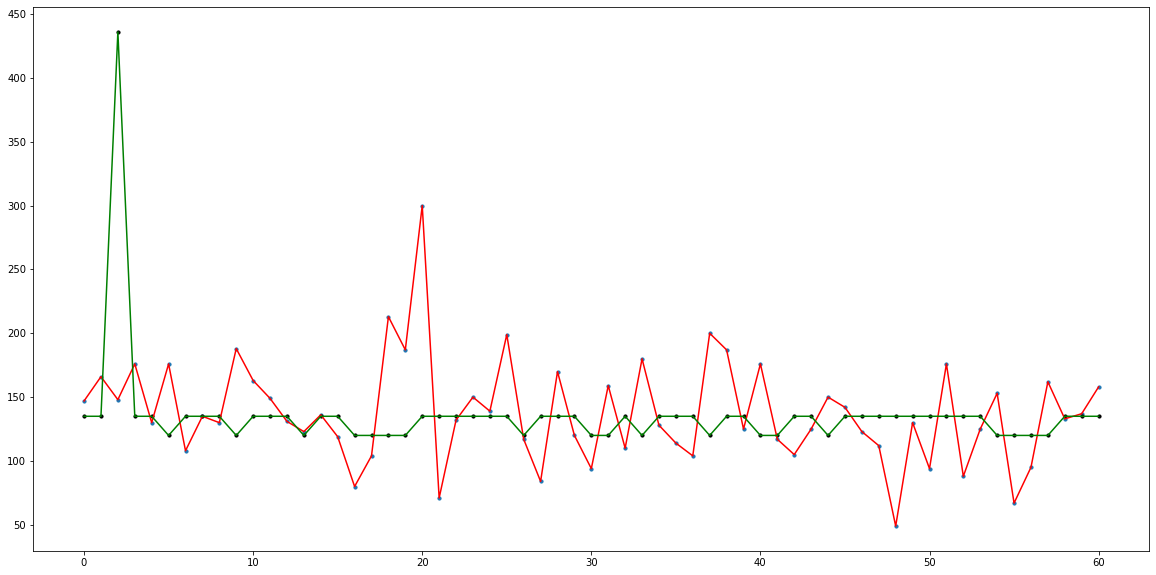

In [345]:
q = B[B['Loan_Status'] == 'N'][['LoanAmount']]

r = range(0,q.shape[0])
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(r,q,s=10)
plt.scatter(r,pred,c='k',s=10)
plt.plot(r,q,c = 'r')
plt.plot(r,pred,c = 'g')

# If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

### xtest

In [347]:
B.Loan_Amount_Term = B.Loan_Amount_Term/12

In [348]:
B.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,30.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,30.0,1.0,Urban,Y


In [399]:
B[(B.Loan_Amount_Term <=20) & (B.Loan_Status == 'N')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
84,LP001450,Male,Yes,0,Graduate,No,4456,0,131.0,15.0,0.0,Semiurban,N
173,LP001979,Male,No,0,Graduate,No,3017,2845,159.0,15.0,0.0,Urban,N
245,LP002355,Male,Yes,0,Graduate,No,3186,3145,150.0,15.0,0.0,Semiurban,N
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,0.5,0.0,Semiurban,N
354,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,15.0,0.0,Semiurban,N


In [359]:
xtest = B[(B.Loan_Amount_Term <=20) & (B.Loan_Status == 'Y')]
xtest = xtest.drop(labels=['Loan_Status','Loan_ID','Loan_Amount_Term'],axis=1)
xtest.index = range(0,xtest.shape[0])

cat = []
con = []

for i in xtest.columns:
    if xtest[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
        
B11 = pd.get_dummies(xtest[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B12= pd.DataFrame(ss.fit_transform(xtest[con]),columns=con)

xtest_final = B12.join(B11)

### xtrain

In [384]:
xtrain = A[A.Loan_Status == 'Y']
xtrain1 = xtrain
xtrain1 = xtrain[xtest.columns]
xtrain1.index = range(0,xtrain1.shape[0])

cat = []
con = []

for i in xtrain1.columns:
    if xtrain1[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
        
B11 = pd.get_dummies(xtrain1[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B12= pd.DataFrame(ss.fit_transform(xtrain1[con]),columns=con)

xtrain_final = B12.join(B11)

### ytrain

In [377]:
ytrain_final = xtrain[['Loan_Amount_Term']]
ytrain_final.index = range(0,ytrain.shape[0])

In [387]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain_final,ytrain_final)
pred = model.predict(xtest_final)

In [389]:
pred = pred/12

In [395]:
q.shape

(29, 1)

In [391]:
q = B[(B.Loan_Amount_Term <=20) & (B.Loan_Status == 'Y')][['Loan_Amount_Term']]

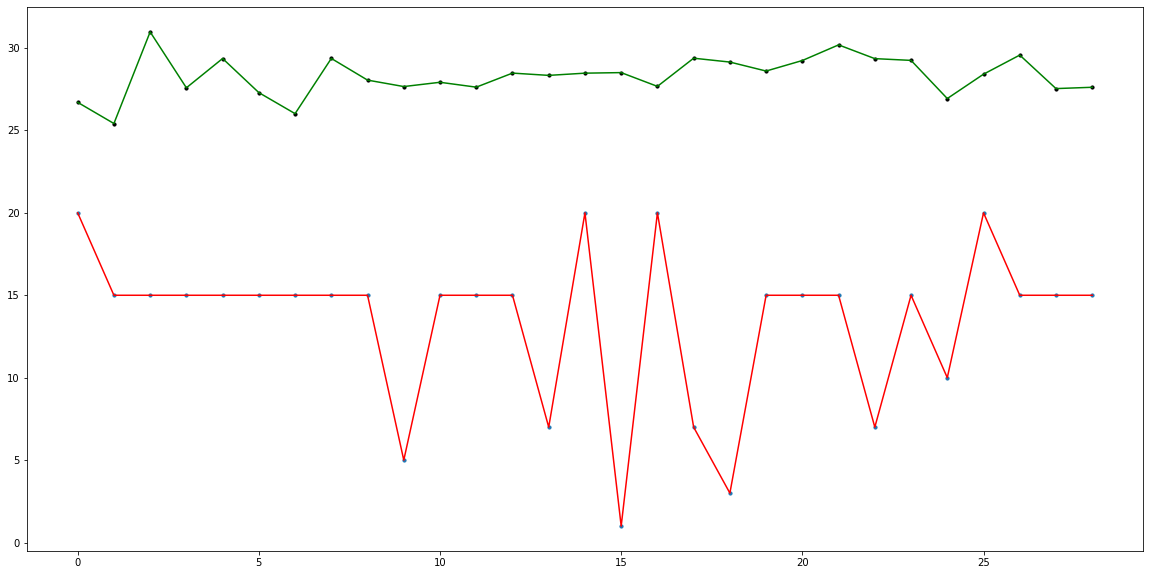

In [396]:
r = range(0,29)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(r,q,s=10)
plt.scatter(r,pred,c='k',s=10)
plt.plot(r,q,c = 'r')
plt.plot(r,pred,c = 'g')